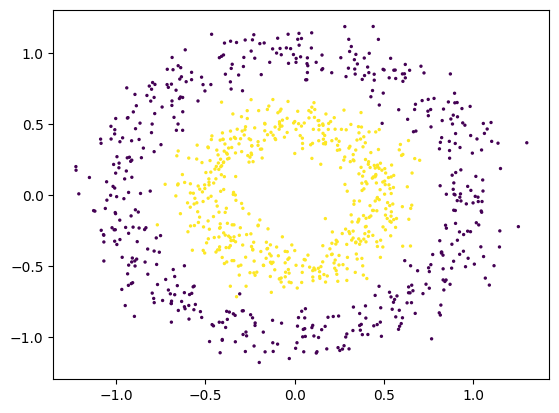

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
n_samples =1000;
np.random.seed(0)
#Data, labels = datasets.make_moons(n_samples, noise=0.10)
Data, labels = datasets.make_circles(n_samples,factor=.5, noise=0.10)
#Data, labels = datasets.make_blobs(n_samples=n_samples,centers=2, random_state=0)
plt.scatter(Data[:, 0], Data[:, 1], c=labels, s=2, cmap='viridis')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(labels), 1)
labels = onehot_encoder.fit_transform(integer_encoded)
print(labels)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Data, labels, test_size=0.25, random_state=42)


In [ ]:
'''
# for first data set
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
      layers.Dense(2, activation="softmax"),
      layers.Dense(4, activation="tanh"),
      layers.Dense(2, activation="tanh")
  ])
#'''

'\n# for first data set\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\n\nmodel = keras.Sequential([\n      layers.Dense(2, activation="softmax"),\n      layers.Dense(4, activation="tanh"),\n      layers.Dense(2, activation="tanh")\n  ])\n#'

In [ ]:
#'''
# for second data set
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
      layers.Dense(4, activation="relu"),
      layers.Dense(4, activation="selu"),
      layers.Dense(2, activation="elu")
  ])
#'''

In [ ]:
'''
# for third data set
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    #layers.Dense(10, activation="softmax"),
    #layers.Dense(2, activation="selu"),
    layers.Dense(2, activation="selu")
])
'''

'\n# for third data set\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\n\nmodel = keras.Sequential([\n    #layers.Dense(10, activation="softmax"),\n    #layers.Dense(2, activation="selu"),\n    layers.Dense(2, activation="selu")\n])\n'

In [ ]:
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
'''
# for first data set
trained = model.fit(x_train,
                    y_train,
                    epochs=90,
                    batch_size=12,
                   )
history_dict = trained.history
history_dict.keys()
'''

'\n# for first data set\ntrained = model.fit(x_train,\n                    y_train,\n                    epochs=90,\n                    batch_size=12,\n                   )\nhistory_dict = trained.history\nhistory_dict.keys()\n'

In [ ]:
#'''
# for second data set
trained = model.fit(x_train,
                    y_train,
                    epochs=90,
                    batch_size=12,
                   )
history_dict = trained.history
history_dict.keys()
#'''

Epoch 1/90
63/63 [==============================] - 3s 6ms/step - loss: 0.3286 - accuracy: 0.4907
Epoch 2/90
63/63 [==============================] - 1s 10ms/step - loss: 0.2583 - accuracy: 0.4947
Epoch 3/90
63/63 [==============================] - 1s 9ms/step - loss: 0.2457 - accuracy: 0.5107
Epoch 4/90
63/63 [==============================] - 0s 5ms/step - loss: 0.2387 - accuracy: 0.6013
Epoch 5/90
63/63 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.6440
Epoch 6/90
63/63 [==============================] - 0s 4ms/step - loss: 0.2268 - accuracy: 0.6600
Epoch 7/90
63/63 [==============================] - 0s 3ms/step - loss: 0.2204 - accuracy: 0.7027
Epoch 8/90
63/63 [==============================] - 0s 3ms/step - loss: 0.2136 - accuracy: 0.7120
Epoch 9/90
63/63 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.7533
Epoch 10/90
63/63 [==============================] - 0s 6ms/step - loss: 0.1968 - accuracy: 0.7533
Epoch 11/90
63/63 

dict_keys(['loss', 'accuracy'])

In [ ]:
'''
# for third data set
trained = model.fit(x_train,
                    y_train,
                    epochs=60,
                    batch_size=10,
                   )
history_dict = trained.history
history_dict.keys()
'''

'\n# for third data set\ntrained = model.fit(x_train,\n                    y_train,\n                    epochs=60,\n                    batch_size=10,\n                   )\nhistory_dict = trained.history\nhistory_dict.keys()\n'

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


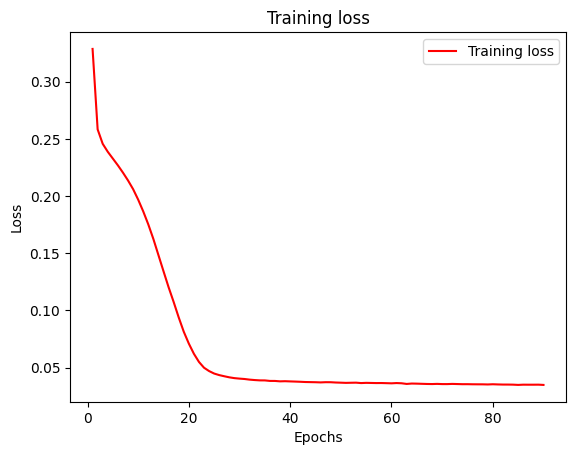

In [ ]:
import matplotlib.pyplot as plt

history_dict = trained.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_train, y_train)
print(results)

results = model.evaluate(x_test, y_test)
print(results)

24/24 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9933
[0.035142283886671066, 0.9933333396911621]
8/8 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.9880
[0.038569193333387375, 0.9879999756813049]


32/32 [==============================] - 0s 2ms/step


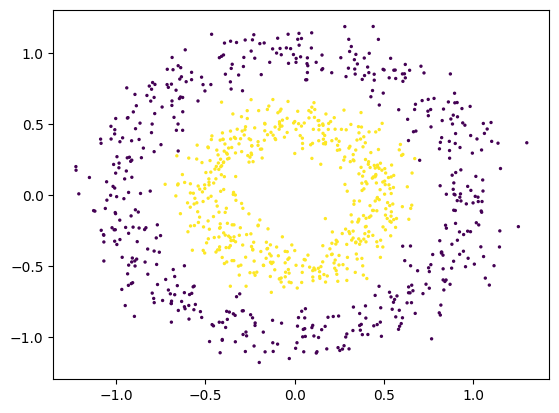

In [ ]:
predictions = (model.predict(Data) > 0.5).astype("int32")
plt.scatter(Data[:, 0], Data[:, 1], c=predictions[:,1], s=2, cmap='viridis')
